# Pandas

Messing about with the [NSW Penalty data](http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv)

`imports`, you've seen this before!

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [4]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [5]:
filepath = "~/Documents/autos.csv"
if os.path.isfile("~/Documents/autos.csv"):
    print "loading from file"

autos_data = pd.read_csv(filepath)
print "done"

done


In [1]:
autos_data.head()

NameError: name 'autos_data' is not defined

`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

We can also get the list of columns out of the data frame

In [7]:
autos_data.columns

Index([u'dateCrawled', u'name', u'seller', u'offerType', u'price', u'abtest',
       u'vehicleType', u'yearOfRegistration', u'gearbox', u'powerPS', u'model',
       u'kilometer', u'monthOfRegistration', u'fuelType', u'brand',
       u'notRepairedDamage', u'dateCreated', u'nrOfPictures', u'postalCode',
       u'lastSeen'],
      dtype='object')

In [12]:
autos_data.drop([129969], axis=0, inplace=True)

This is useful for you when you are documenting your dataset, you can make each column a heading, and then describe that column's characteristics.

You can't index a row directly, you need to use the iloc property.

This gives us the row as a _Series_.

↓

In [47]:
row_one = autos_data.iloc[5449]
row_one

dateCrawled                                      2016-03-20 12:42:48
name                   BMW_E39_523i_Top_Gepflegt_und_Wenig_Kilometer
seller                                                        privat
offerType                                                    Angebot
price                                                           4000
abtest                                                          test
vehicleType                                                limousine
yearOfRegistration                                              2001
gearbox                                                      manuell
powerPS                                                          170
model                                                            5er
kilometer                                                     125000
monthOfRegistration                                                3
fuelType                                                      benzin
brand                             

Series objects are _very_ similar to dictionaries. They have more properties though.

In [17]:
row_one["price"]

18300

Doing the same thing on a dataframe gives us the whole column

In [9]:
autos_data["powerPS"]

0           0
1         190
2         163
3          75
4          69
5         102
6         109
7          50
8         125
9         101
10        105
11        140
12        115
13        131
14        190
15          0
16         60
17         75
18        136
19        102
20        160
21        231
22         90
23         50
24        118
25        193
26        125
27         99
28         50
29         60
         ... 
371498    101
371499     54
371500    150
371501    174
371502    125
371503     68
371504      0
371505    101
371506    105
371507    140
371508    125
371509    110
371510    145
371511    150
371512    260
371513    105
371514     95
371515     55
371516     50
371517    140
371518      3
371519    150
371520    225
371521      0
371522      0
371523      0
371524    101
371525    102
371526    100
371527    320
Name: powerPS, dtype: int64

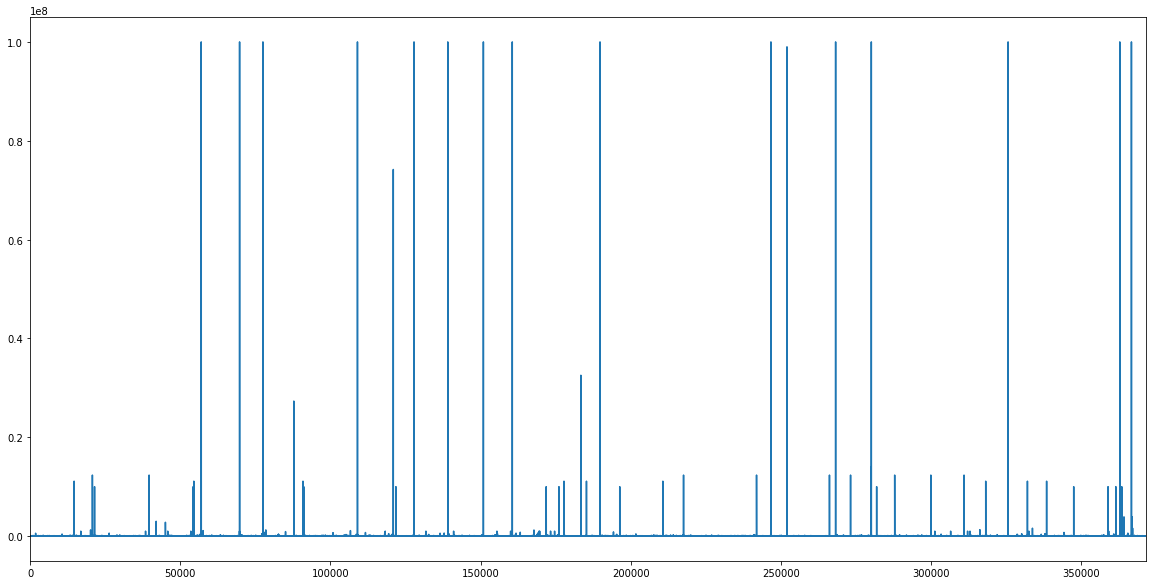

In [13]:
autos_data["price"].plot()

If we do a simple `plot` on this column we get a pretty dense, but useless graph. It much better one would be a histogram.

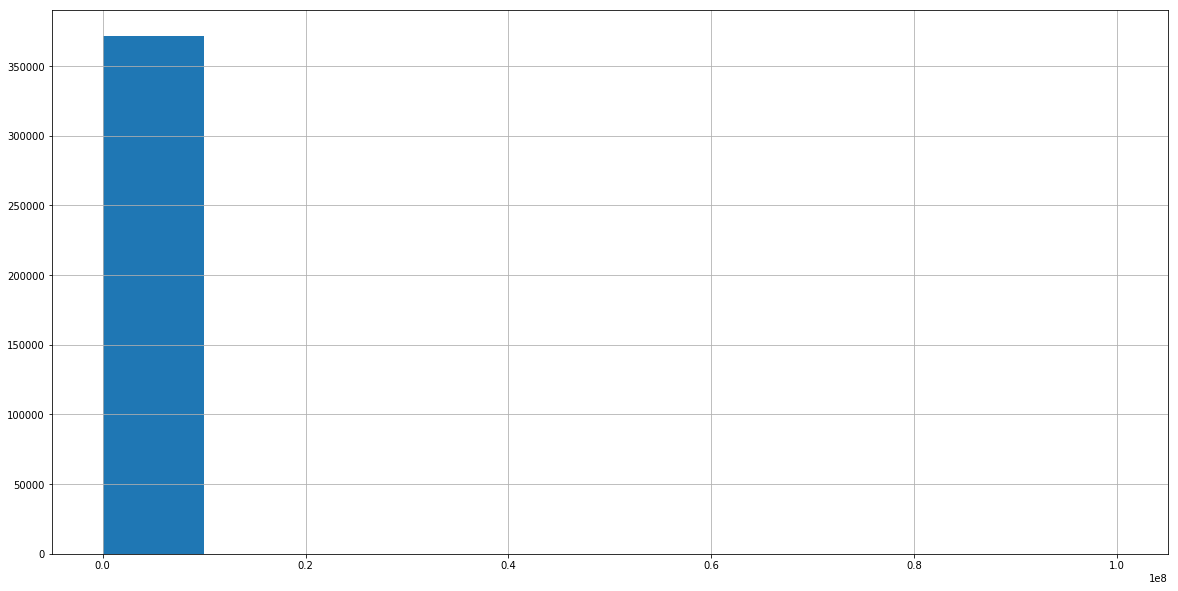

In [14]:
autos_data["price"].hist()

The problem we have now is that almost _all_ fines are less than $2000, but there's a very long tail that fills up the right of the graph.

Let's exclude all the values above $3000, and see what it looks like.

We can do that with a nice feature of pandas, boolean indexing:

In [38]:
autos_data[autos_data["price"] == max(autos_data["price"])]


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
129969,2016-03-11 08:37:57,Kaufe_AUTOS_Zum_basteln,privat,Angebot,2147483647,test,andere,1996,manuell,888,NaN,150000,1,andere,sonstige_autos,ja,2016-03-11 00:00:00,0,4720,2016-03-20 11:45:35


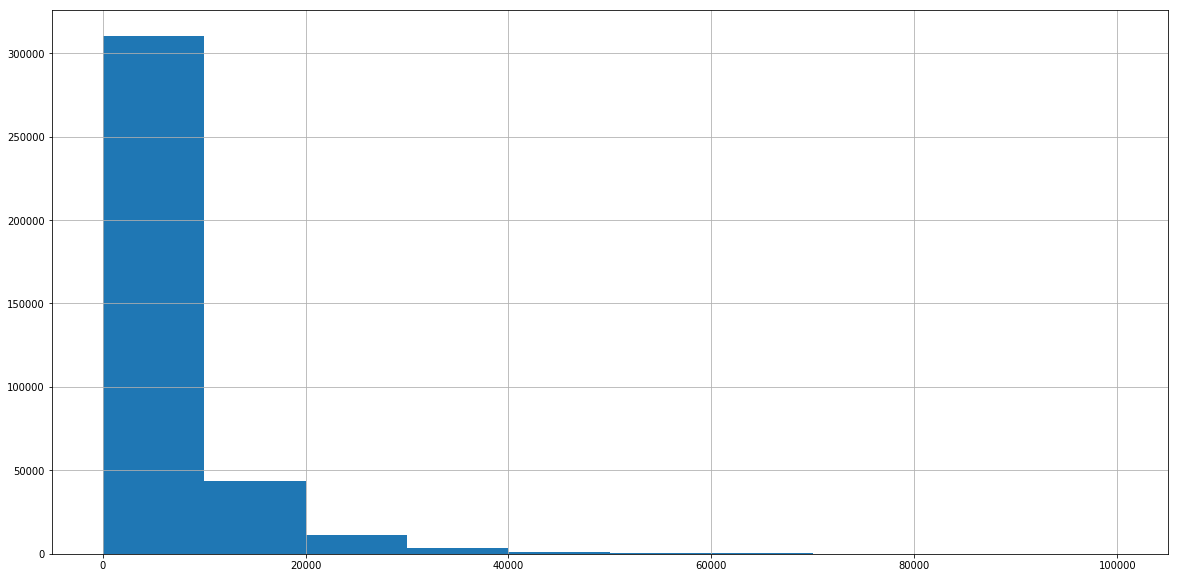

In [15]:
autos_data["price"][autos_data["price"] < 100000].hist()

That's pretty crazy/powerful, so let's see that happen a bit more clearly.

We'll make our own series and call it  `some_numbers`

Let's give it the values 0-99 

In [16]:
# Note the capital S, I have no idea why they did that!
# but if you get an `AttributeError: 'module' object has no attribute 'series'` error...
#                 v
some_numbers = pd.Series(range(100))
some_numbers.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

We can use boolean indexing to get just the values that are less than 8

In [16]:
some_numbers[some_numbers < 8]

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
dtype: int64

Or we can be fancy and get the numbers that are less than 4 _or_ more than 97:

In [46]:
some_numbers[(some_numbers < 4) | (some_numbers > 97)] #this needs the round brackets,
                                                       # not really sure why.

0      0
1      1
2      2
3      3
98    98
99    99
dtype: int64

We can be _really fancy_ too!

This needs to resolve to a list of booleans that matches the list of inputs. It's filtering only for values that are True.

If we use a list comprehension then we can do almost anything we like!

In [47]:
pets = ["Dog", "Goat", "pig", "Sheep", "Cattle", "Zebu", "Cat", "Chicken", "Guinea pig",         "Donkey", "duck", "Water buffalo", "Western honey bee", "dromedary camel", "Horse", 
        "silkmoth", "pigeon", "goose", "Yak", "Bactrian camel", "Llama", "Alpaca", "guineafowl",         "Ferret", "muscovy duck", "Barbary dove", "Bali cattle", "Gayal", "turkey", "Goldfish", 
        "rabbit", "Koi", "canary", "Society finch", "Fancy mouse", "Siamese fighting fish",         "Fancy rat and Lab rat", "mink", "red fox", "hedgehog", "Guppy"]

pets_series = pd.Series(pets)
pattern_of_bools = ["o" in x for x in pets_series]
print pattern_of_bools

pets_series[pattern_of_bools]

[True, True, False, False, False, False, False, False, False, True, False, True, True, True, True, True, True, True, False, False, False, False, True, False, True, True, False, False, False, True, False, True, False, True, True, False, False, False, True, True, False]


0                   Dog
1                  Goat
9                Donkey
11        Water buffalo
12    Western honey bee
13      dromedary camel
14                Horse
15             silkmoth
16               pigeon
17                goose
22           guineafowl
24         muscovy duck
25         Barbary dove
29             Goldfish
31                  Koi
33        Society finch
34          Fancy mouse
38              red fox
39             hedgehog
dtype: object

_Note: the first `in` means a different thing to the second `in`. I was wondering if I should leave this out, but it's probably good to expose you to strange stuff!_

Anyway, back to our fines, it looks like we have a similar pattern of fines here, lots at the bottom end, not so many high value ones. 

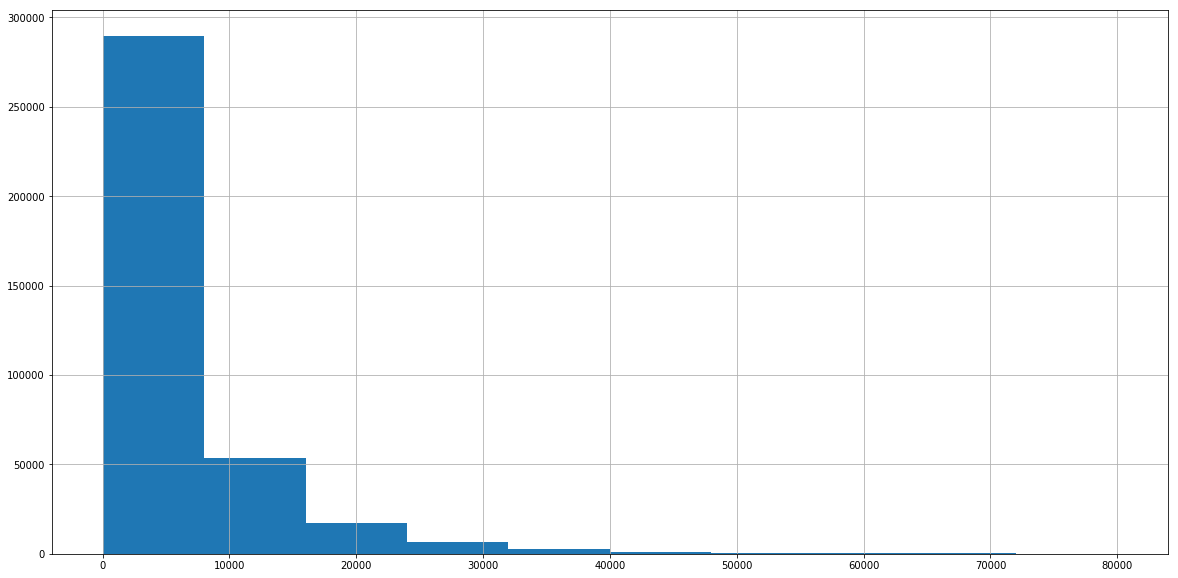

In [20]:
autos_data["price"][autos_data["price"] < 80000].hist()

Let's see what's under $1000

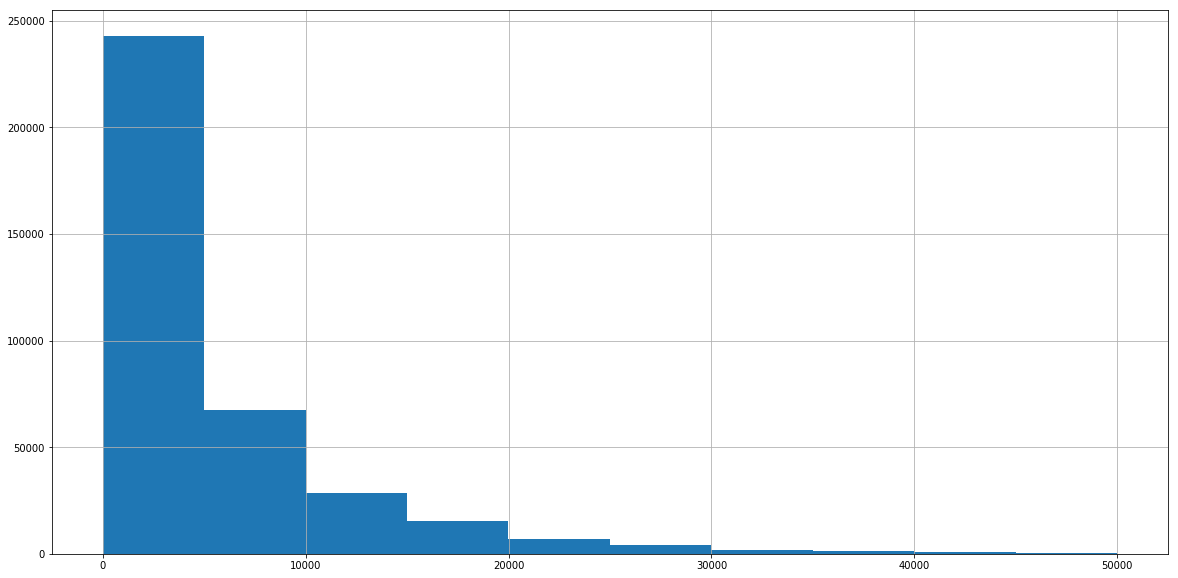

In [21]:
autos_data["price"][autos_data["price"] < 50000].hist()

This warants some further investigation, but we'll come back to it in a bit. First, let's look at some of the other columns.

In the `brand` column it tells us which brands of cars were listed.

In [23]:
autos_data["brand"].value_counts()

volkswagen        79640
bmw               40274
opel              40136
mercedes_benz     35309
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3981
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
Name: brand, dtype: int64

The 'name' column returns a whole bunch of names that aren't uniformed

In [29]:
autos_data["name"].value_counts()

Ford_Fiesta                                                           657
BMW_318i                                                              627
Opel_Corsa                                                            622
Volkswagen_Golf_1.4                                                   603
BMW_316i                                                              523
BMW_320i                                                              492
Volkswagen_Polo                                                       475
Renault_Twingo                                                        447
Volkswagen_Golf                                                       428
Volkswagen_Golf_1.6                                                   413
Volkswagen_Polo_1.2                                                   412
BMW_116i                                                              394
Opel_Corsa_1.2_16V                                                    373
Opel_Corsa_B                          

In [30]:
autos_data["powerPS"].value_counts()

0        40820
75       24035
60       15907
150      15442
140      13585
101      13313
90       12748
116      11963
170      10982
105      10429
125       7051
136       6952
102       6500
163       6287
54        5752
143       5547
122       5322
131       5179
110       4862
109       4817
50        4661
80        4050
120       3914
177       3886
58        3855
69        3655
115       3332
95        3023
45        2991
68        2828
         ...  
1367         1
15017        1
685          1
7515         1
6062         1
1625         1
1707         1
1105         1
6226         1
584          1
332          1
8011         1
15033        1
3144         1
442          1
953          1
3000         1
331          1
587          1
1100         1
5809         1
952          1
696          1
589          1
1102         1
1870         1
5815         1
16051        1
1360         1
1398         1
Name: powerPS, dtype: int64

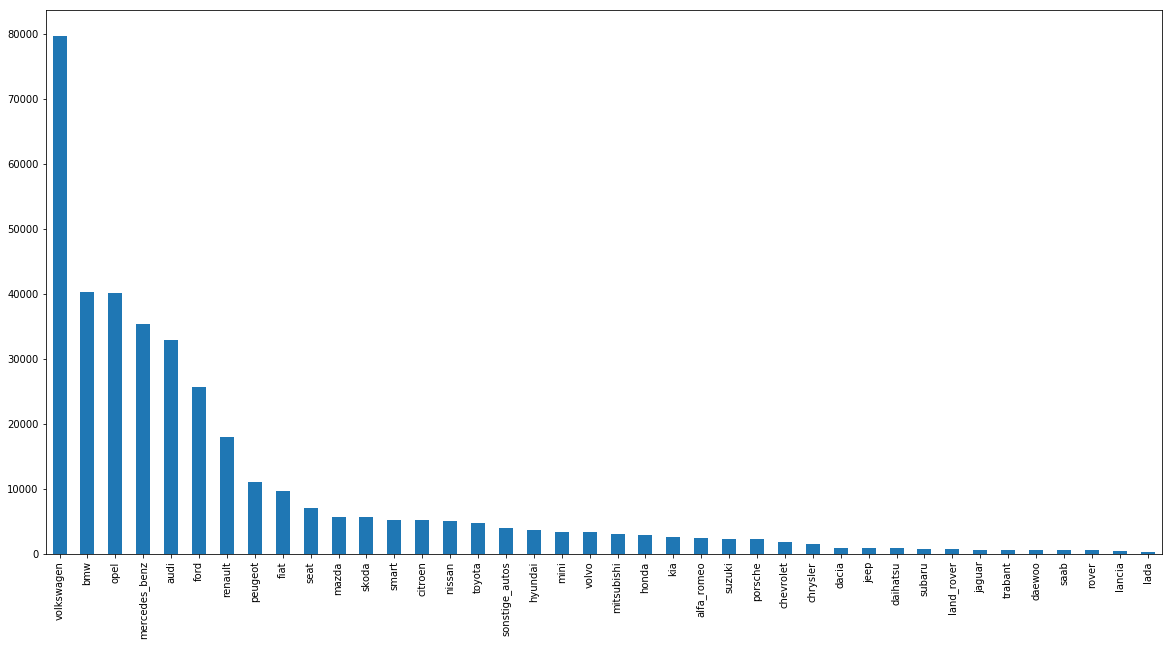

In [25]:
autos_data["brand"].value_counts().plot(kind="bar")

We're going to see this distribution over and over again as we look at all kinds of data set.

These are probably the most common distributions, but they leave off the [power law](https://en.wikipedia.org/wiki/Power_law), which I think this probably is. 
![](http://blog.cloudera.com/wp-content/uploads/2015/12/distribution.png)
[img](http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/)

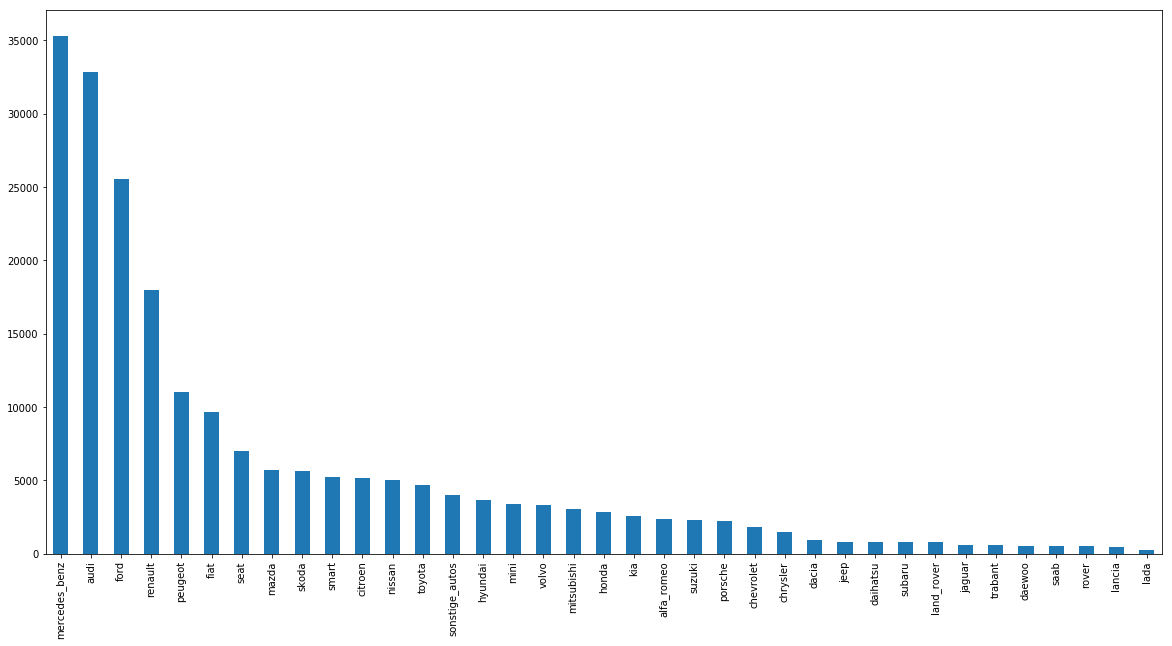

In [26]:
advc = autos_data["brand"].value_counts()
advc[advc < 40000].plot(kind="bar")

This pattern keeps repeating itself:

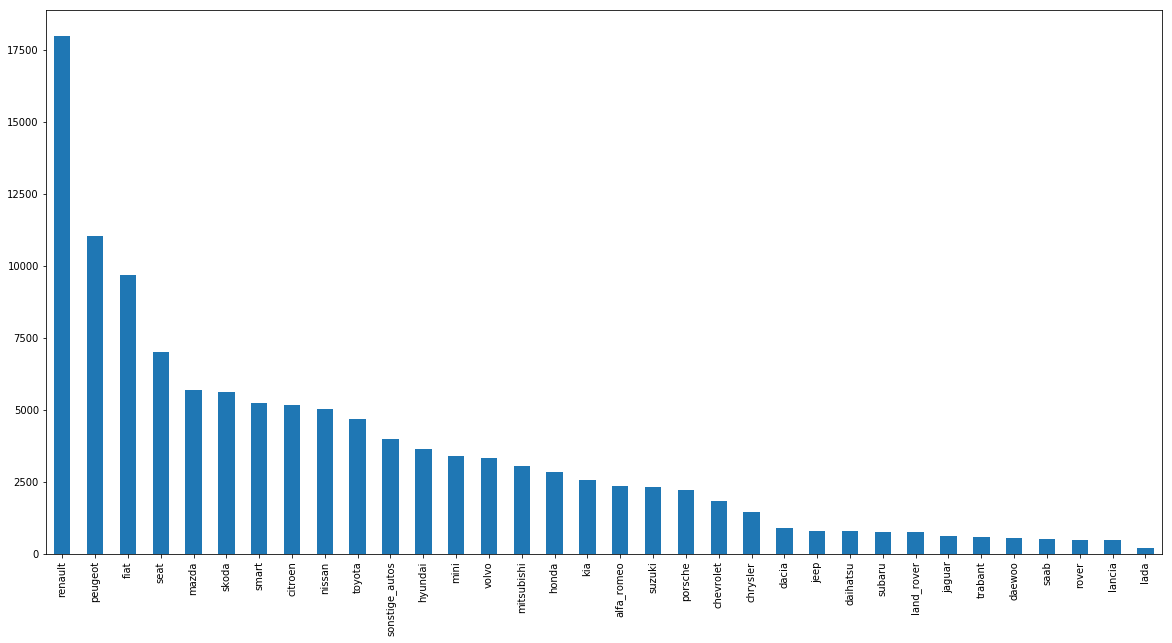

In [27]:
advc[advc < 20000].plot(kind="bar")

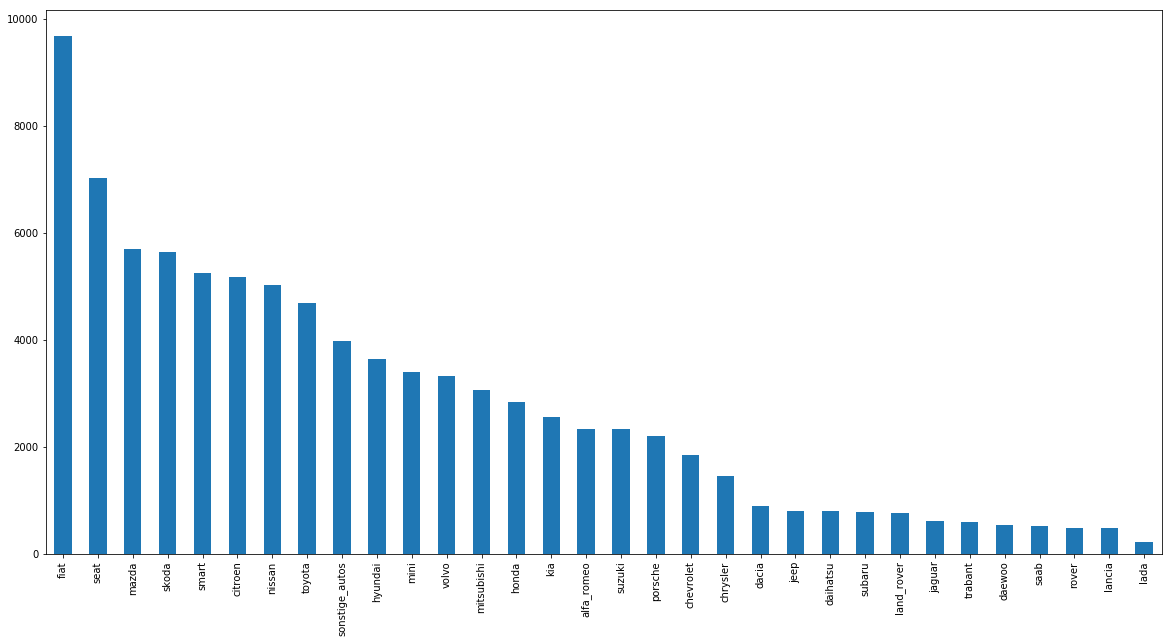

In [28]:
advc[advc < 10000].plot(kind="bar")

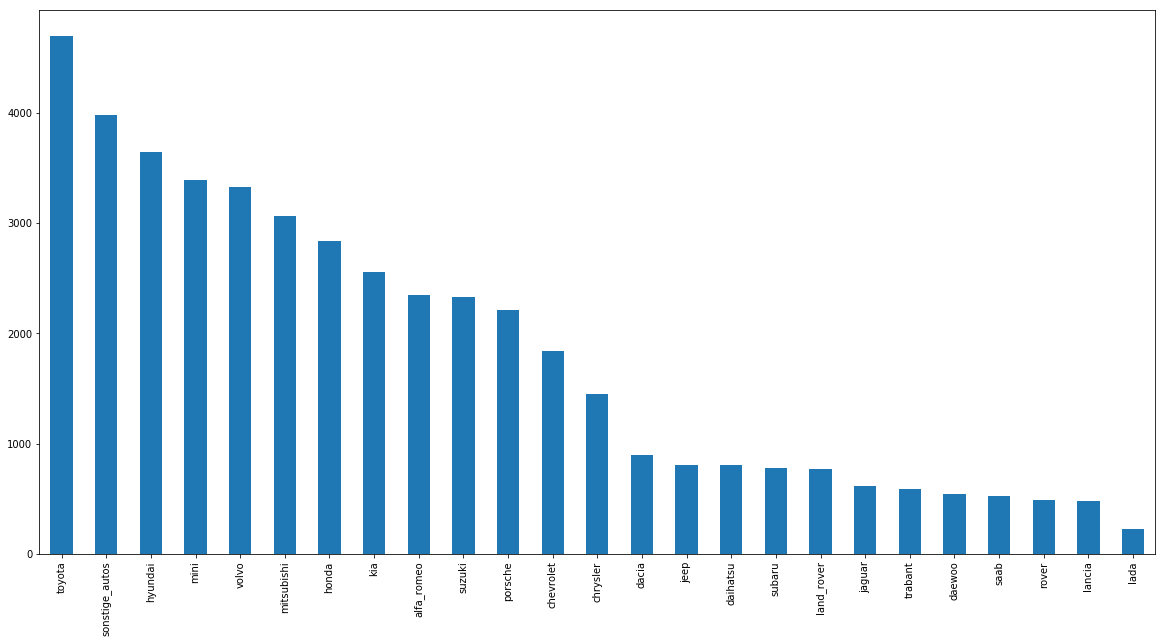

In [31]:
advc[advc < 5000].plot(kind="bar")

# Making plots nice

I said we'd come back to our histogram. [Here's a demo histogram from the matplotlib website](http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html).

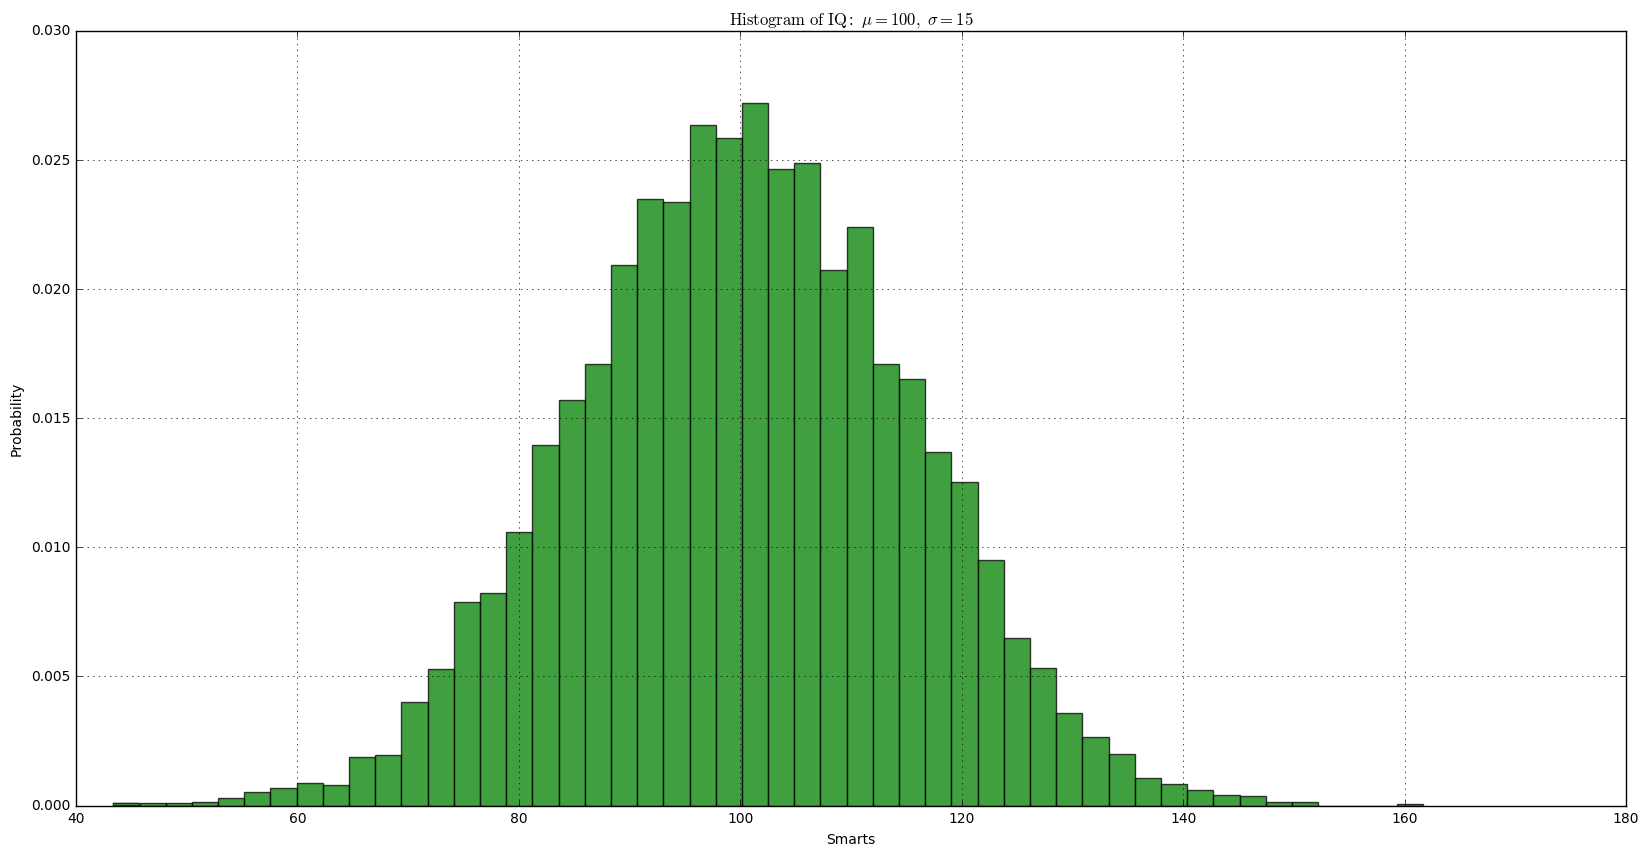

In [48]:
# This bit makes some random data. Ignore it
mu, sigma = 100, 15; x = mu + sigma*np.random.randn(10000)

# the histogram of the data
plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$') # allows for latex formatting
# plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

Here's how we made our histogram before:

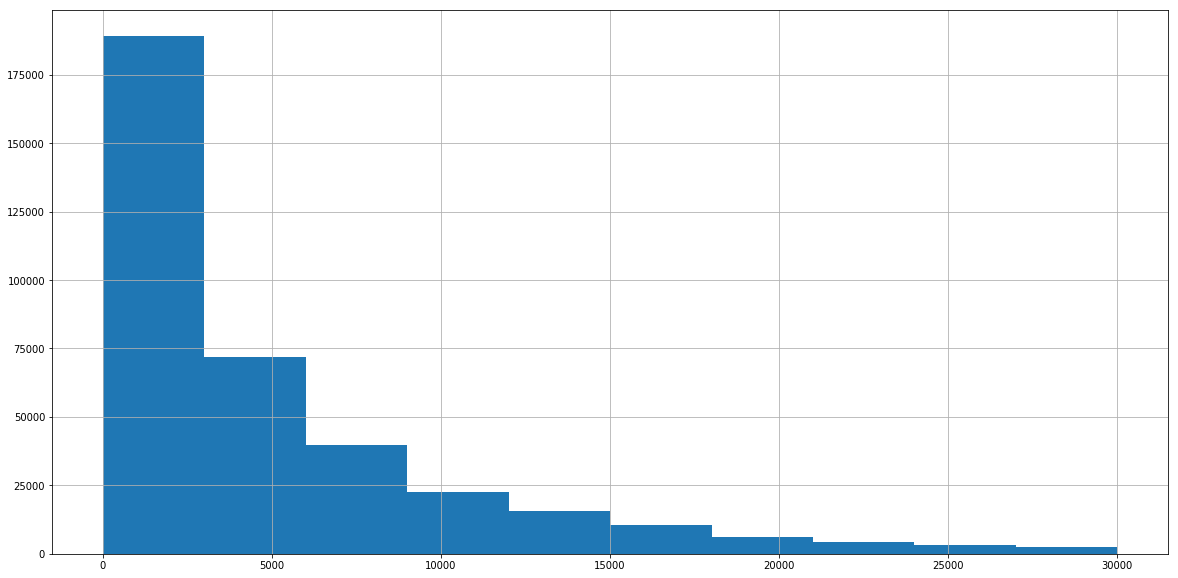

In [36]:
autos_data["price"][autos_data["price"] < 30000].hist()

And this is how we'd change it so that we can add more features:

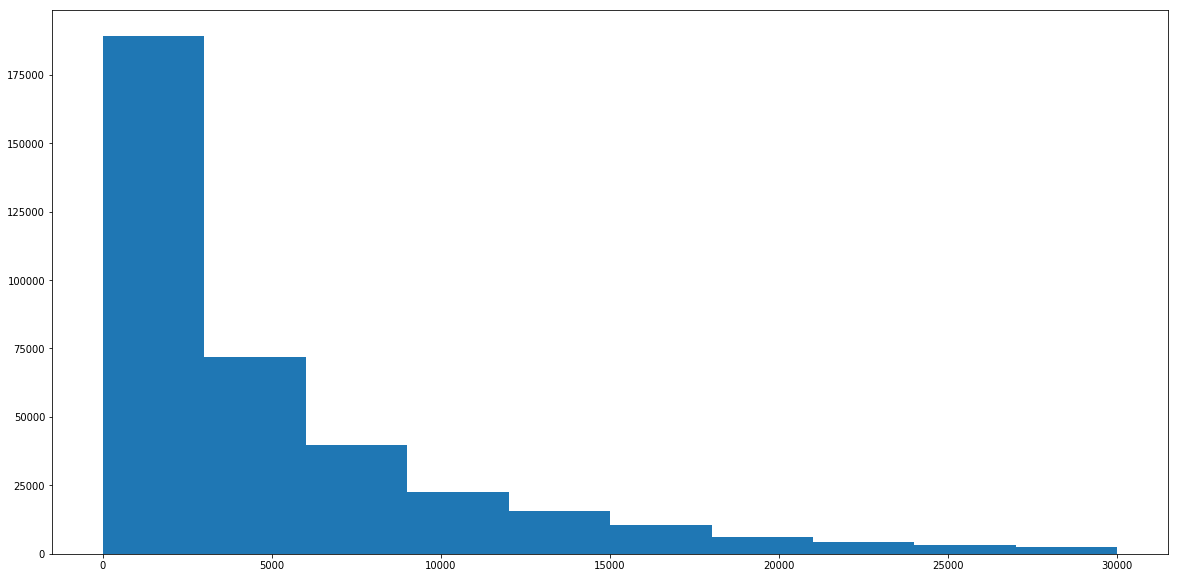

In [37]:
capped_price_data = autos_data["price"][autos_data["price"] < 30000]

plt.hist(capped_price_data)
plt.show()

Let's look at some of the things we can do to this. The docs for histograms are here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

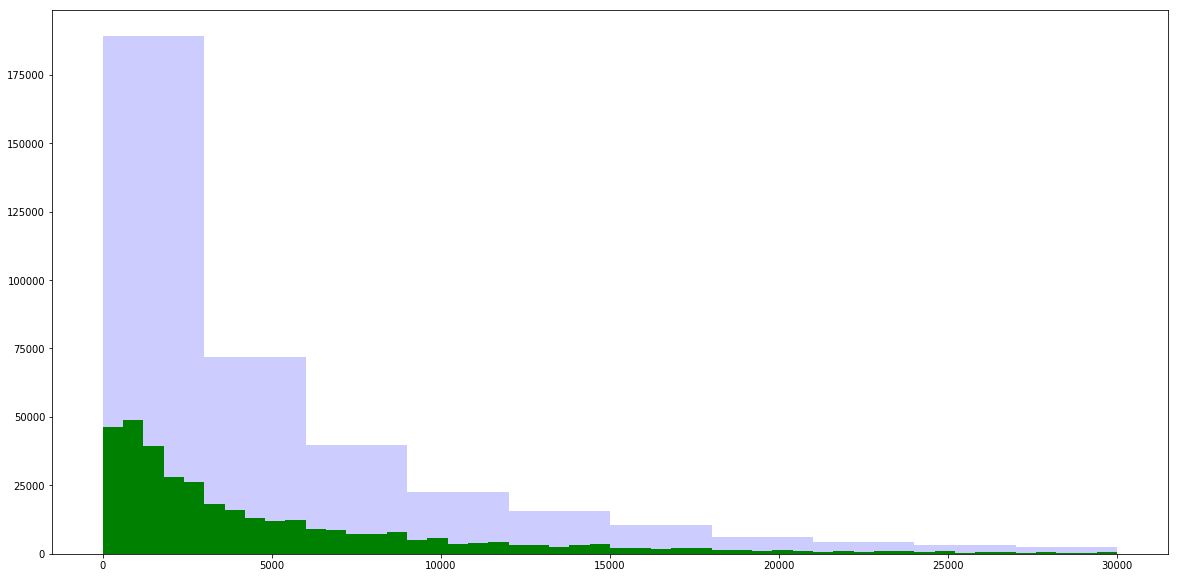

In [38]:
capped_price_data = autos_data["price"][autos_data["price"] < 30000]

plt.hist(capped_price_data, bins=10, facecolor='blue', alpha=0.2) #<-old one
plt.hist(capped_price_data, bins=50, facecolor='green', alpha=1)  #<-new one
plt.show()

We can go back to our initial, unfiltered, data:

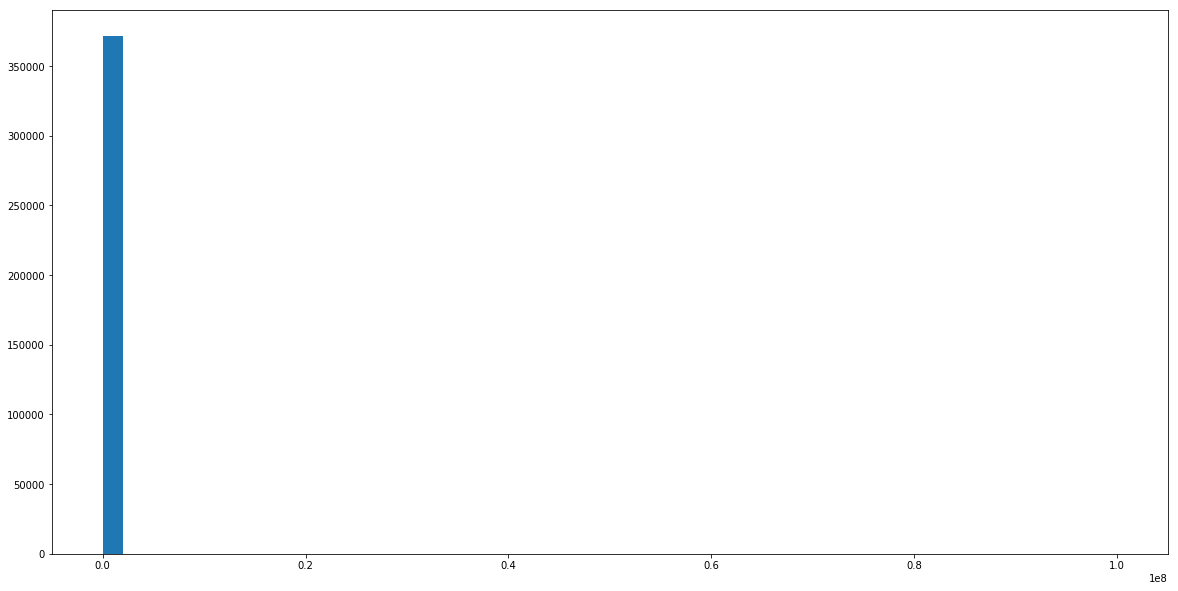

In [41]:
plt.hist(autos_data["price"], bins=50)
plt.show()

Instead of doing the filtering before we present the data, we can use the graph to hide the extents of an axis:

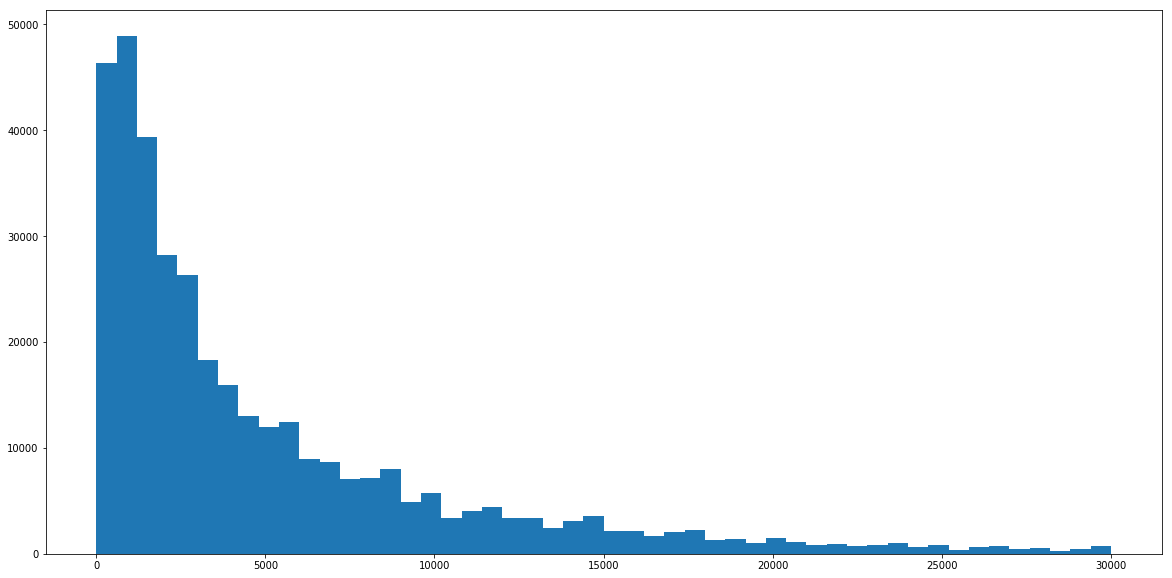

In [42]:
plt.hist(autos_data["price"], bins=50, range=(0, 30000))
plt.show()

We can nice that up a bit by pulling the parameters out as variables:
(unmagically, no difference!)

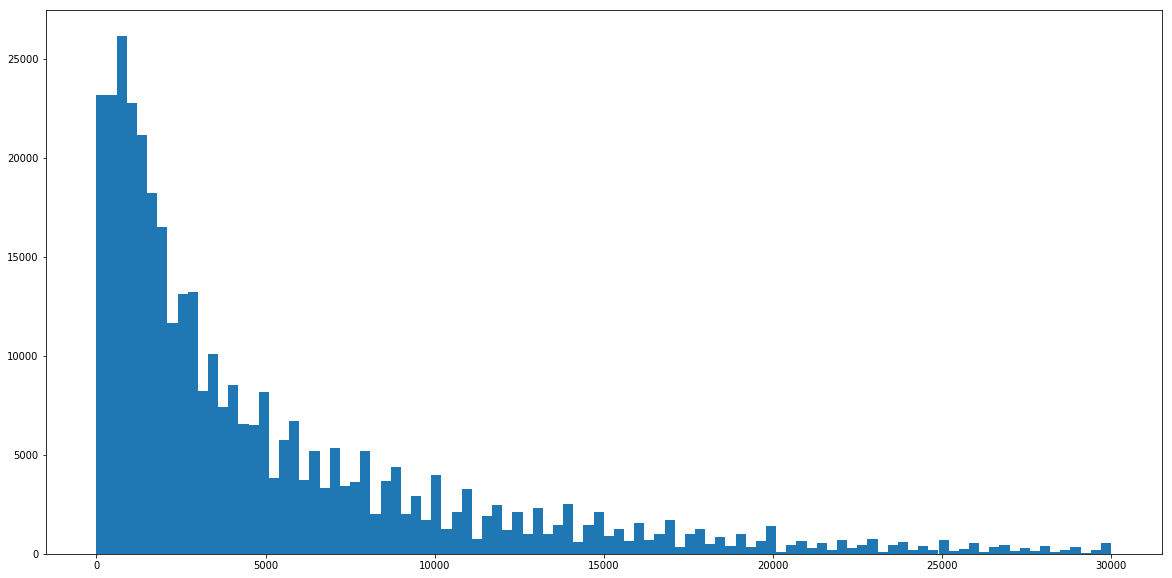

In [44]:
number_of_bins = 100
lower_bound = 0
upper_bound = 30000
plt.hist(autos_data["price"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.show()

This is still pretty naughty, we should have at least a title and some axis lables.

We do that by setting some more properties on the `plt` object:

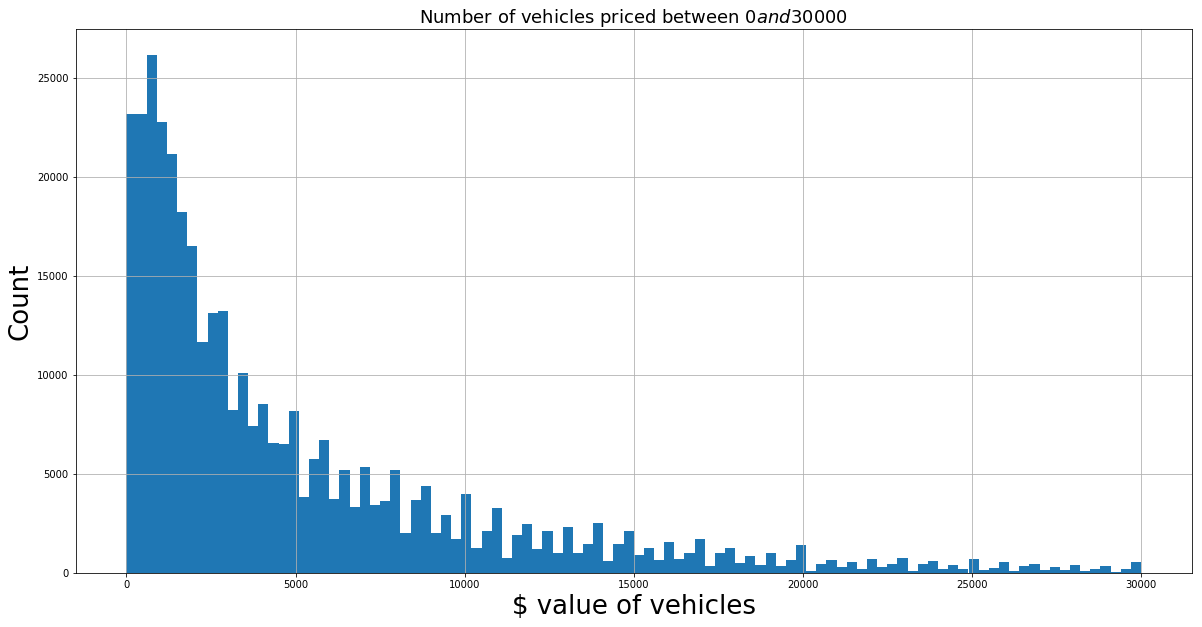

In [45]:
number_of_bins = 100
lower_bound = 0
upper_bound = 30000

plt.hist(autos_data["price"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of vehicles priced between {} and {}".format("$0", "$30000"), fontsize=18)
plt.xlabel('$ value of vehicles', fontsize=26)
plt.ylabel('Count', fontsize=26)
plt.grid(True)
plt.show()

We could get the dates from the dataset if we wanted to be clever about it.

If we reimport the date, but with a bit more cleverness, we can tell pandas to convert the dates to actual dates.

Because _we_ are civilised, we use either iso dates `YYYY-MM-DD` or `DD-MM-YYYY`, but often you'll have to deal with data prepared by savages who don't respect this rational behaviour. They will use `MM-DD-YY` and other such primitive formats.

The settings used here control how it's read. You can only really tell by looking at the data and working it out. E.g. are there months bigger than 12?

In [48]:
autos_data = pd.read_csv(filepath,
                           infer_datetime_format=True,
                           parse_dates=['dateCrawled'],
                           dayfirst=True)
autos_data.head(2)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50


This is some straight up, powerful voodoo.

We're grouping the fines by month, and then adding up the groups. Pandas' `groupby` feature allows for all kinds of clever stuff like that.

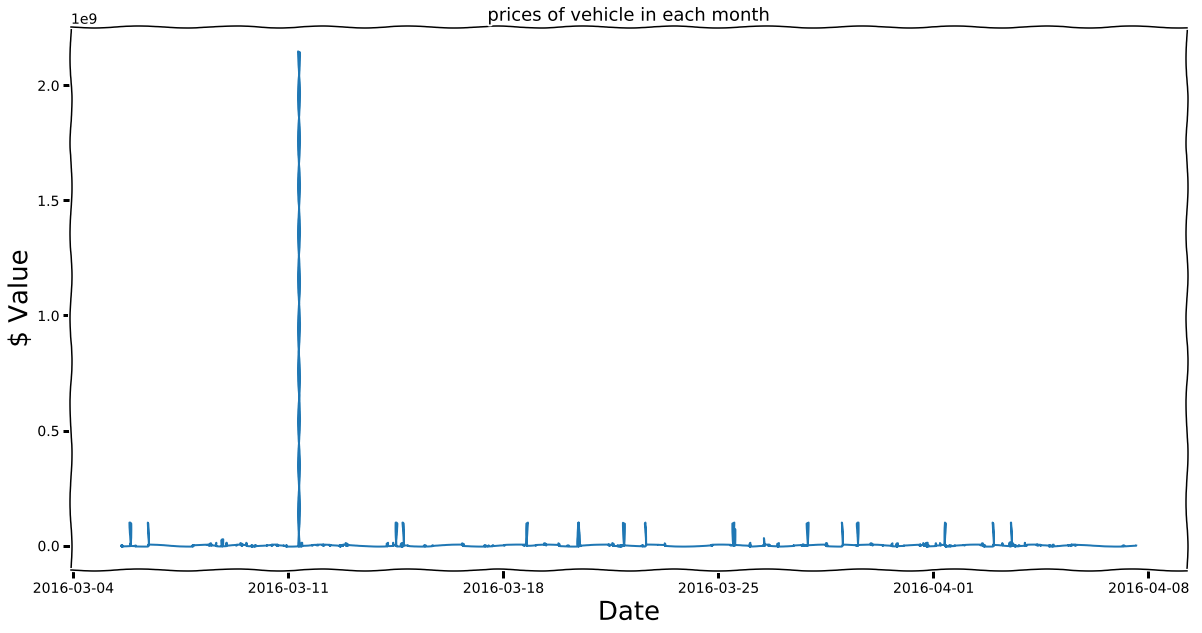

In [51]:
price = autos_data[["dateCrawled","price"]].groupby("dateCrawled").sum()


plt.plot(price)
plt.title("prices of vehicle in each month", fontsize=18)
plt.xlabel('Date', fontsize=26)
plt.ylabel('$ Value', fontsize=26)
plt.grid(True)
plt.show()

In [37]:
matplotlib.rcParams.update(saved_style_state) # revert to regular matplotlib styles, not xkcd

I don't expect you to learn this this week, I just want to give you a taste of what can be done, quite simply, with pandas and matplotlib.

# some tricky tricks

Say you have a _lot_ of rows, running things on them takes a long time. You can test on a subset of that and then come bakc to the full dataframe once you are more sure that it works.

To do this we can use python slices in combination with the dataframe's `.loc` property.

In [38]:
ss = autos_data.loc[:5]

Let's say you want to apply a function to each row in a dataframe, and save the result as a new column in the dataframe. This is where `apply` come in handy.

In [39]:
ss["day"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)
ss.head(1)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,SPEED_CAMERA_IND,SEATBELT_IND,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE,day
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,16238,1
1,2011-2012,2011-07-01,8469,Stop on/near marked foot crossing,ROAD RULES 2008,173(1),265,NaN,NaN,NaN,...,NaN,NaN,NaN,Y,NaN,NaN,NaN,78,20670,1


Above is equivalent to below, it's up to you to decide what is more readable.

In [41]:
def my_f(x):
    return x.day

ss["day"] = ss.apply(my_f, axis=1)
ss.head(1)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,SPEED_CAMERA_IND,SEATBELT_IND,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE,day
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,16238,1


How do we tell the computer to treat _facade_ and _fašade_ the same? What about _University of new south wales_, _University of New South Wales_, _University of NSW_, _UNSW_, _New-south_?

## The answer is _folding_

_(This is a "pattern")_

In [42]:
def fold(given):
    """Return canonical versions of inputs."""
    
    # Use canonical variables so that you can define once, use many times.
    UNSW_canonical = "uni of stairs"
    ben_name_cannonical = "Ben Doherty"

    # dictionary of input:output pairs
    folds = {
        "University of new south wales": UNSW_canonical,
        "University of New South Wales": UNSW_canonical,
        "University of NSW": UNSW_canonical,
        "UNSW": UNSW_canonical,
        "New-south": UNSW_canonical,
        "BDoh": ben_name_cannonical,
        "Benny": ben_name_cannonical,
        "Mr Dockerty": ben_name_cannonical,
        "Oi, Dickehead!": ben_name_cannonical
    }

    return folds[given] # needs a defensive part, but ommited for clarity.

print fold("New-south")
print fold("BDoh")

uni of stairs
Ben Doherty


# _fin_